<a href="https://colab.research.google.com/github/WanyaKruk/DZ-5/blob/main/DZ_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  DZ-5

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
data = pd.read_csv('CO2 Emissions_Canada.csv')
print(data)

       Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6

In [ ]:
 """
 Подробное описание датасета: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles?resource=download

     Количество выбросов CO2 транспортным средством в зависимости от его различных характеристик.
Этот набор данных фиксирует детали того, как выбросы CO2 транспортным средством могут меняться в зависимости от различных характеристик.
Набор данных был взят с официального сайта открытых данных правительства Канады. Содержит данные за 7 лет.

  Состав Датасета:
Количество Образцов: 7385
Количество Признаков: 11 (6 - числовых, 5 - категориальных)
Целевая Переменная: Выбросы CO2 (CO2 Emissions(g/km))

  Описание колонок:
MAKE: Производитель автомобиля.
MODEL: Модель автомобиля.
VEHICLE CLASS: Класс автомобиля.
ENGINE SIZE: Объем двигателя в литрах.
CYLINDERS: Количество цилиндров в двигателе.
TRANSMISSION: Тип трансмиссии.
FUEL TYPE: Тип топлива.
FUEL CONSUMPTION (CITY): Расход топлива в городе (литров на 100 км).
FUEL CONSUMPTION (HWY): Расход топлива на шоссе (литров на 100 км).
FUEL CONSUMPTION (COMB): Комбинированный расход топлива (миль на 1 галлон).
CO2 EMISSIONS: Выбросы CO2 (грамм на километр) - целевая переменная, которую мы пытаемся предсказать.

  Аббревиатуры, используемые в датасете:
MODEL
4WD/4X4 = Полный привод
AWD = Полный привод
FFV = Гибкотопливный автомобиль
SWB = Короткая колесная база
LWB = Длинная колесная база
EWB = Удлиненная колесная база
TRANSMISSION
A = Автоматическая
AM = Автоматизированная ручная
AS = Автоматическая с выбором переключения передач
AV = Бесступенчатая
M = Механическая
3 - 10 = Количество передач
FUEL TYPE
X = Обычный бензин
Z = Премиальный бензин
D = Дизельное топливо
E = Этанол (E85)
N = Природный газ

 """

'\nПодробное описание датасета: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles?resource=download\n\n    Количество выбросов CO2 транспортным средством в зависимости от его различных характеристик.\nЭтот набор данных фиксирует детали того, как выбросы CO2 транспортным средством могут меняться в зависимости от различных характеристик.\nНабор данных был взят с официального сайта открытых данных правительства Канады. Содержит данные за 7 лет.\n\n Состав Датасета:\nКоличество Образцов: 7385\nКоличество Признаков: 11 (6 - числовых, 5 - категориальных)\nЦелевая Переменная: Выбросы CO2 (CO2 Emissions(g/km))\n\n Описание колонок:\nMAKE: Производитель автомобиля.\nMODEL: Модель автомобиля.\nVEHICLE CLASS: Класс автомобиля.\nENGINE SIZE: Объем двигателя в литрах.\nCYLINDERS: Количество цилиндров в двигателе.\nTRANSMISSION: Тип трансмиссии.\nFUEL TYPE: Тип топлива.\nFUEL CONSUMPTION (CITY): Расход топлива в городе (литров на 100 км).\nFUEL CONSUMPTION (HWY): Расход топлив

In [ ]:
print(data.isnull().sum())    # Проверим на пустые значения

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


In [ ]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
data.dtypes    # Посмотрим на типы данных вдатасете

,0
Make,object
Model,object
Vehicle Class,object
Engine Size(L),float64
Cylinders,int64
Transmission,object
Fuel Type,object
Fuel Consumption City (L/100 km),float64
Fuel Consumption Hwy (L/100 km),float64
Fuel Consumption Comb (L/100 km),float64


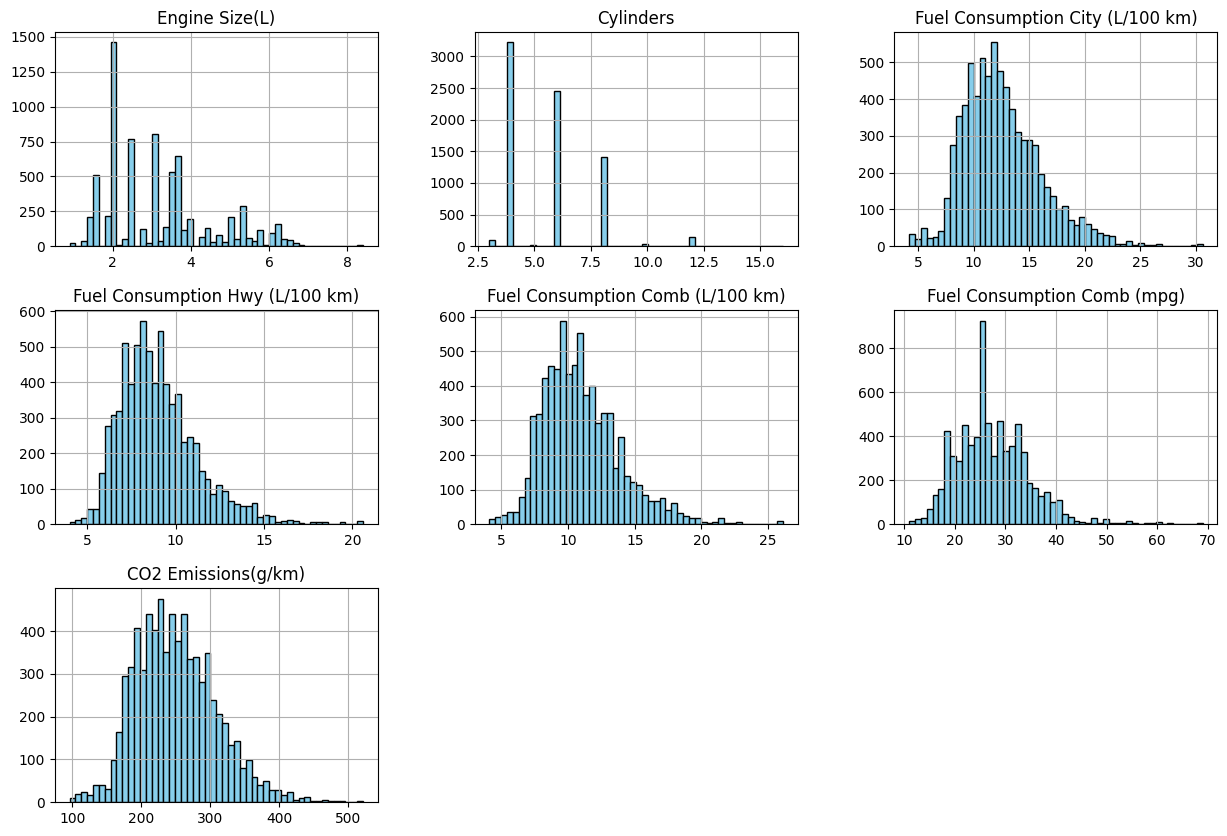

In [ ]:
# Визуализация

data.hist(bins=50, figsize=(15, 10), color='skyblue', edgecolor='black')    # Построим гистограммы
plt.show()

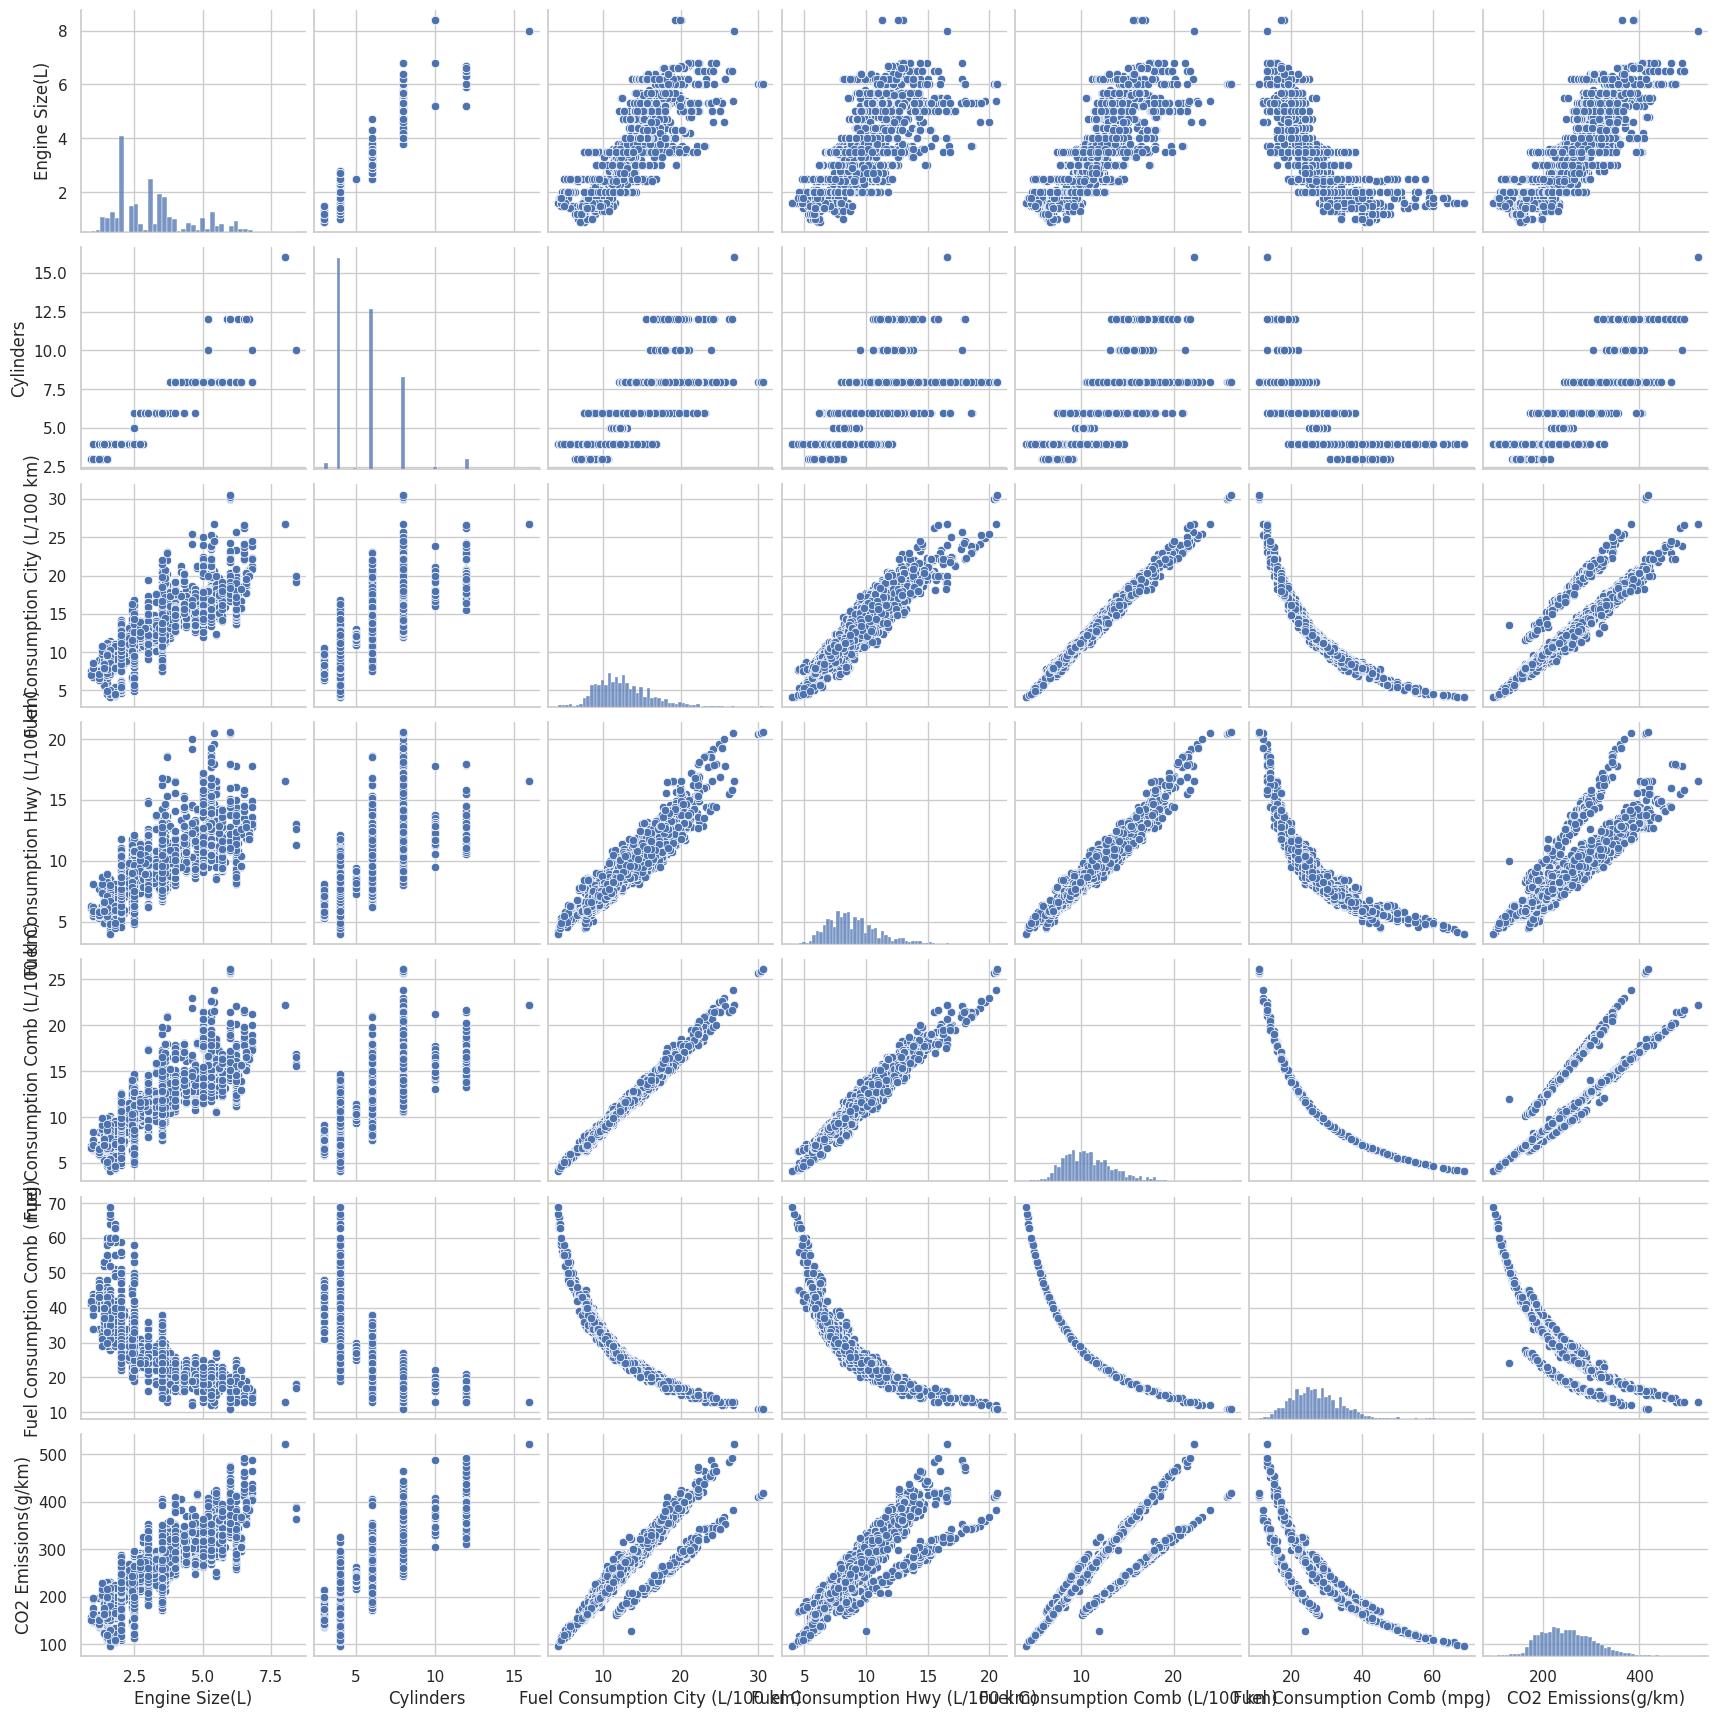

In [ ]:
# Парные диаграммы рассеяния
import seaborn as sns

sns.set(style="whitegrid")
sns.pairplot(data)
plt.show()

In [19]:
  # Расчет корреляционной матрицы
